# Examen Practico 

#### 01-3900 | Ciencia de datos | 2024

Alumno: Facundo Nicolas Carballo

## Enunciado

Se tienen un dataset con datos de pacientes internados en un hospital (TP_Virus_Alumnos.csv). La clase de interes (1) refiere a la presencia de un virus. El virus tiene normalmente una gravedad leve/baja y el tratamiento suele ser invasivo. Datos como nombre y apellido han sido eliminados y los valores tanto en sangre (BLD), hormonales u otros analisis sobre reactivos han sido alterados en sus valores para preservar la privacidad. Se aclara que no se ha modificado su capacidad predictiva (Si es que la tienen).


Para su conocimiento: </BR>
Datos generales de Edad, Peso, Altura y condicion laboral (Activo, Pasivo etc).

Datos medidos en hospital:</BR>
BLD: Sangre</BR>
LVL: Hormonales</BR>
REC: Otros analisis</BR>

Se pide obtener con los datos disponibles el mejor modelo posible que prediga la presencia o ausencia del virus. 
Dado que el tratamiento es invasivo y la grevedad es moderada se requiere "atrapar" tantos "1" como sea posible y minimizar los falsos positivos para evitar que reciban un tratamiento de estas caracteristicas personas que no presentan el virus. Intente obtener el mejor modelo que maximice la metrica que considere correspondiente.



## Como desarrollar el examen

A partir del dataset realice todas las acciones para poder llegar al mejor modelo, explique brevemente en los fundamentos de sus transformaciones o acciones en general. 

La nota derivara de: </BR>
1.La calidad de la clasificacion realizada</BR>
2.La fundamentacion de los pasos realizados</BR>
3.Lo sencillo de llevar a produccion el desarrollo</BR> 



Los docentes evaluaran su clasificador utilizando un conjunto de datos del dataset "fuera de la caja" (out of the box, al que usted no tiene acceso). Para minimizar la posible diferencia entre su medicion y la medicion del docente recuerde y aplique conceptos de test, validacion cruzada y evite los errores comunes de sesgo de seleccion y fuga de datos (PPT/Pdf arboles de clasificacion) o  Sklearn "10. Common pitfalls and recommended practices" disponible en "https://scikit-learn.org/stable/common_pitfalls.html"   

Al final del notebook encontrara un bloque de codigo que lee la muestra adicional (a la que usted no tiene acceso) si PRODUCCION==True, en caso contrario solo lee una submuestra del conjunto original para validar que el codigo funciona. Desarrolle el notebook como considere, para finalmente asignar el mejor clasificador que usted haya obtenido remplazando en f_clf = None, None por su clasificador. Implemente todas las transformaciones entre esa linea y la predicion final (Evitando al fuga de datos). Ver TP_AutomatizarTransformaciones.ipynb

En materiales del MIEL se adjunta un notebook que propone algunas ideas para automatizar el proceso.

# Desarrollo

## Analisis del Enunciado

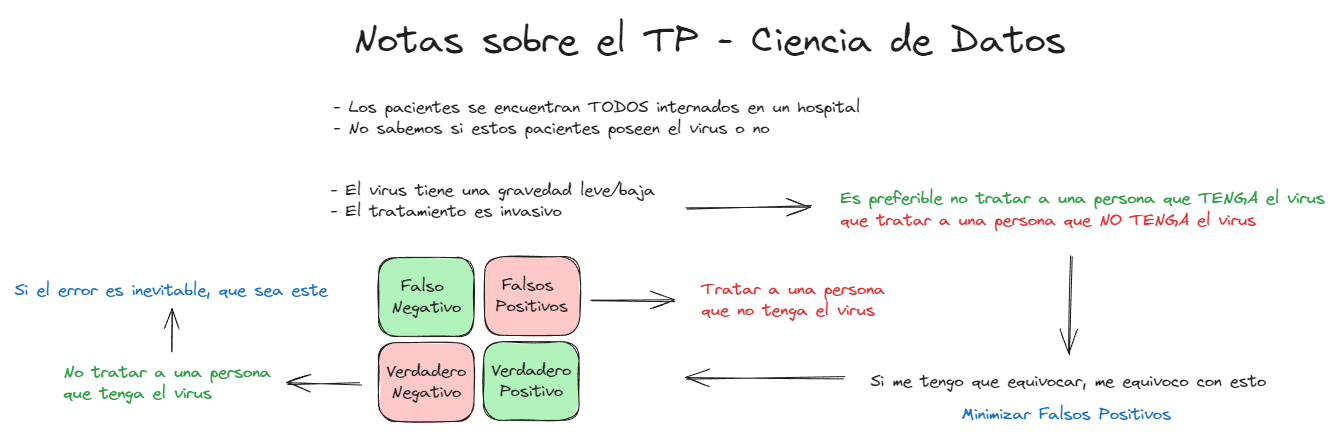

Este diagrama lo hice con esta aplicacion: https://excalidraw.com/

## Modelos de Entrenamiento

In [1]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

class Models:
    def __init__(self) -> None:
        pass

    def gaussian(self) -> GaussianNB:
        return GaussianNB()
    
    def decission_tree_classfier(self, max_depth = 7, random_state = 0) -> DecisionTreeClassifier:
        return DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)
    
    def logistic_regression(self) -> LogisticRegression:
        return LogisticRegression(
            C=0.1,
            class_weight='balanced',
            fit_intercept=True,
            l1_ratio=0.5,
            max_iter=100,
            penalty='l1',
            solver='saga',
            tol=0.0001,
            random_state=0
        )

## Standar Scaler

In [2]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

def standard_scaler_preparacion_datos(df: pd.DataFrame, target: str, with_scaler: bool):
    x = df.drop(target, axis=1)
    y = df[target]

    if with_scaler:
        scaler = StandardScaler(with_mean=True, with_std=True)
        scaler.fit(x)
        x_scaled = pd.DataFrame(scaler.transform(x), columns=df.drop(target, axis=1).columns)
        return x_scaled, y

    return x, y

## Analisis del Dataset

### Cargamos el dataset

In [3]:
df = pd.read_csv("./dataset.csv")
df.head(10)

Edad     Genero        Peso     Laboral  hijos     BLD01      REC1  \
0   9.0   Femenino   36.410602    Inactivo      0  3.139714  6.929112   
1  58.0  Masculino  115.507184    Inactivo      4  2.953914  4.660136   
2  74.0  Masculino   81.249035      Activo      3  1.365200  3.005861   
3   NaN  Masculino   77.985589  No_declara      0  2.329285  4.344642   
4   1.0   Femenino   13.446208    Inactivo      0 -0.062975  3.938741   
5  39.0  Masculino  100.752944      Activo      4  0.574689  3.868364   
6  77.0  Masculino   81.238369    Inactivo      4  1.531349  4.318537   
7  48.0  Masculino  108.241968  No_declara      1  3.192311  4.072476   
8  63.0        NaN   81.907770      Activo      4  1.185980  3.799356   
9  29.0        NaN   82.157068      Activo      0  2.464750  5.324854   

        REC2       REC3       REC4       REC5     BLD02     BLD03  \
0  63.712640  73.880613  15.087239  90.400193  2.015331  1.633836   
1  64.582610  73.669319  14.503106  90.817947  0.973317 -0.439358   
2  63.613454  75.103984  14.077988  91.741638  3.243344  0.380413   
3  64.433115  73.402436  15.583846  91.741709  3.188290 -0.226046   
4  65.122602  75.007982  16.961593  90.668625  2.729202  0.589698   
5  63.126609  73.410501  15.789951  89.211917  1.169552  1.099371   
6  63.513104  71.025204  14.779903  89.160829  2.034808  1.116236   
7  63.834061  73.652055  16.787495  92.143975  1.745791  1.386591   
8  63.638205  75.423896  14.515515  88.874644  1.662188  0.514841   
9  63.820457  72.639370  15.890319  90.383575  0.639324 -0.841893   

              LVL  target  
0       51.411632       0  
1  1000000.000000       0  
2  1000000.000000       1  
3             NaN       0  
4       21.627303       1  
5      115.070380       0  
6  1000000.000000       1  
7      104.976352       0  
8      119.076322       1  
9  1000000.000000       1

### Chequeamos los `string` del dataset

Note que la columna `Laboral` y `Genero` es de tipo `string`.

Para poder entrenar el modelo, necesito pasar todos los datos a numeros de tipo `float`.

Primero, vamos a analizar los `string` que contiene esta columna y despues vamos a ver la forma de mappear estos `string` a `float`

#### Genero

In [4]:
column_name = 'Genero'

In [5]:
df[column_name].unique()

array(['Femenino', 'Masculino', nan, 'Otro'], dtype=object)

Son solo 3 `string` que estan presentes en la columna `Genero`

- Femenino  -> 0
- Masculino -> 1
- Otro      -> 2

In [6]:
df[column_name] = df[column_name].replace({'Femenino': 0, 'Masculino': 1, 'Otro': 2})

C:\Users\Facundo\AppData\Local\Temp\ipykernel_31080\4233939459.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column_name] = df[column_name].replace({'Femenino': 0, 'Masculino': 1, 'Otro': 2})


In [7]:
df.head(10)

Edad  Genero        Peso     Laboral  hijos     BLD01      REC1       REC2  \
0   9.0     0.0   36.410602    Inactivo      0  3.139714  6.929112  63.712640   
1  58.0     1.0  115.507184    Inactivo      4  2.953914  4.660136  64.582610   
2  74.0     1.0   81.249035      Activo      3  1.365200  3.005861  63.613454   
3   NaN     1.0   77.985589  No_declara      0  2.329285  4.344642  64.433115   
4   1.0     0.0   13.446208    Inactivo      0 -0.062975  3.938741  65.122602   
5  39.0     1.0  100.752944      Activo      4  0.574689  3.868364  63.126609   
6  77.0     1.0   81.238369    Inactivo      4  1.531349  4.318537  63.513104   
7  48.0     1.0  108.241968  No_declara      1  3.192311  4.072476  63.834061   
8  63.0     NaN   81.907770      Activo      4  1.185980  3.799356  63.638205   
9  29.0     NaN   82.157068      Activo      0  2.464750  5.324854  63.820457   

        REC3       REC4       REC5     BLD02     BLD03             LVL  target  
0  73.880613  15.087239  90.400193  2.015331  1.633836       51.411632       0  
1  73.669319  14.503106  90.817947  0.973317 -0.439358  1000000.000000       0  
2  75.103984  14.077988  91.741638  3.243344  0.380413  1000000.000000       1  
3  73.402436  15.583846  91.741709  3.188290 -0.226046             NaN       0  
4  75.007982  16.961593  90.668625  2.729202  0.589698       21.627303       1  
5  73.410501  15.789951  89.211917  1.169552  1.099371      115.070380       0  
6  71.025204  14.779903  89.160829  2.034808  1.116236  1000000.000000       1  
7  73.652055  16.787495  92.143975  1.745791  1.386591      104.976352       0  
8  75.423896  14.515515  88.874644  1.662188  0.514841      119.076322       1  
9  72.639370  15.890319  90.383575  0.639324 -0.841893  1000000.000000       1

#### Laboral

In [8]:
column_name = 'Laboral'

In [9]:
df[column_name].unique()

array(['Inactivo', 'Activo', 'No_declara'], dtype=object)

Son solo 3 `string` que estan presentes en la columna `Laboral`

- Inactivo   -> 0
- Activo     -> 1
- No_declara -> 2

In [10]:
df[column_name] = df[column_name].replace({'Inactivo': 0, 'Activo': 1, 'No_declara': 2})

C:\Users\Facundo\AppData\Local\Temp\ipykernel_31080\676125588.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column_name] = df[column_name].replace({'Inactivo': 0, 'Activo': 1, 'No_declara': 2})


In [11]:
df.head()

Edad  Genero        Peso  Laboral  hijos     BLD01      REC1       REC2  \
0   9.0     0.0   36.410602        0      0  3.139714  6.929112  63.712640   
1  58.0     1.0  115.507184        0      4  2.953914  4.660136  64.582610   
2  74.0     1.0   81.249035        1      3  1.365200  3.005861  63.613454   
3   NaN     1.0   77.985589        2      0  2.329285  4.344642  64.433115   
4   1.0     0.0   13.446208        0      0 -0.062975  3.938741  65.122602   

        REC3       REC4       REC5     BLD02     BLD03             LVL  target  
0  73.880613  15.087239  90.400193  2.015331  1.633836       51.411632       0  
1  73.669319  14.503106  90.817947  0.973317 -0.439358  1000000.000000       0  
2  75.103984  14.077988  91.741638  3.243344  0.380413  1000000.000000       1  
3  73.402436  15.583846  91.741709  3.188290 -0.226046             NaN       0  
4  75.007982  16.961593  90.668625  2.729202  0.589698       21.627303       1

### Chequeamos los nulos del dataset

In [12]:
df.isnull().sum()

Edad        822
Genero     1682
Peso          0
Laboral       0
hijos         0
BLD01         0
REC1          0
REC2          0
REC3          0
REC4          0
REC5          0
BLD02         0
BLD03         0
LVL         527
target        0
dtype: int64

#### Completamos nulos de `Edad` y `LVL` con la media

In [13]:
df['Edad'] = df['Edad'].fillna(df['Edad'].mean())
df['LVL'] = df['LVL'].fillna(df['LVL'].mean())
df.head(10)

Edad  Genero        Peso  Laboral  hijos     BLD01      REC1  \
0   9.000000     0.0   36.410602        0      0  3.139714  6.929112   
1  58.000000     1.0  115.507184        0      4  2.953914  4.660136   
2  74.000000     1.0   81.249035        1      3  1.365200  3.005861   
3  38.658082     1.0   77.985589        2      0  2.329285  4.344642   
4   1.000000     0.0   13.446208        0      0 -0.062975  3.938741   
5  39.000000     1.0  100.752944        1      4  0.574689  3.868364   
6  77.000000     1.0   81.238369        0      4  1.531349  4.318537   
7  48.000000     1.0  108.241968        2      1  3.192311  4.072476   
8  63.000000     NaN   81.907770        1      4  1.185980  3.799356   
9  29.000000     NaN   82.157068        1      0  2.464750  5.324854   

        REC2       REC3       REC4       REC5     BLD02     BLD03  \
0  63.712640  73.880613  15.087239  90.400193  2.015331  1.633836   
1  64.582610  73.669319  14.503106  90.817947  0.973317 -0.439358   
2  63.613454  75.103984  14.077988  91.741638  3.243344  0.380413   
3  64.433115  73.402436  15.583846  91.741709  3.188290 -0.226046   
4  65.122602  75.007982  16.961593  90.668625  2.729202  0.589698   
5  63.126609  73.410501  15.789951  89.211917  1.169552  1.099371   
6  63.513104  71.025204  14.779903  89.160829  2.034808  1.116236   
7  63.834061  73.652055  16.787495  92.143975  1.745791  1.386591   
8  63.638205  75.423896  14.515515  88.874644  1.662188  0.514841   
9  63.820457  72.639370  15.890319  90.383575  0.639324 -0.841893   

              LVL  target  
0       51.411632       0  
1  1000000.000000       0  
2  1000000.000000       1  
3   227134.359847       0  
4       21.627303       1  
5      115.070380       0  
6  1000000.000000       1  
7      104.976352       0  
8      119.076322       1  
9  1000000.000000       1

#### Completamos los nulos de `Genero` con un algoritmo especial

In [14]:
column_name = 'Genero'

##### Proporcion de masculinos y femeninos en el dataset

In [15]:
masculines = 0
femenines = 0
total = 0

for idx, row in df.iterrows():
    if row[column_name] == 0:
        total += 1
        femenines += 1
    if row[column_name] == 1:
        total += 1
        masculines += 1
        
print("Masculinos: " + str(round((masculines / total)*100, 2)) + "%")
print("Femeninos: " + str(round((femenines / total)*100, 2)) + "%")

Masculinos: 87.09%
Femeninos: 12.91%


##### Algoritmo para rellenar los Generos en `NaN`

In [16]:
import numpy as np

class GenderFill:
    def __init__(
            self, 
            df: pd.DataFrame, 
            column_name: str, 
            nan_to_masculines: int, 
            nan_to_femenines: int
    ):
        self.df = df
        self.column_name = column_name
        self.nan_to_masculines = nan_to_masculines
        self.nan_to_femenines = nan_to_femenines
        
    def basic(self):
        for idx, row in self.df.iterrows():
            if np.isnan(row[self.column_name]) == False:
                continue
            if self.nan_to_masculines > 0:
                self.nan_to_masculines -= 1
                self.df.loc[idx, self.column_name] = 1
                continue
            if self.nan_to_femenines > 0:
                self.nan_to_femenines -= 1
                self.df.loc[idx, self.column_name] = 0

    def decission_tree_classifier(self):
        df_cleaned = self.df.dropna(subset=[column_name])
        
        X_target = df_cleaned.drop(column_name, axis=1)
        Y_target = df_cleaned[column_name]
        
        models = Models()
        model = models.decission_tree_classfier()

        model.fit(X_target, Y_target)

        X_test = self.df[df[self.column_name].isna()]
        X_test = X_test.drop(column_name, axis=1)
        y_pred = model.predict(X_test)
        
        for idx, row in self.df.iterrows():
            i = 0
            if np.isnan(row[self.column_name]):
                self.df.loc[idx, self.column_name] = y_pred[i]
                i += 1


In [17]:
total_nan = df[column_name].isnull().sum()
nan_to_masculines = round(total_nan * (masculines/total))
nan_to_femenines = round(total_nan * (femenines/total))

gender_fill = GenderFill(
    df=df,
    column_name=column_name,
    nan_to_masculines=nan_to_masculines, 
    nan_to_femenines=nan_to_femenines
)
gender_fill.decission_tree_classifier()

df.head(10)

Edad  Genero        Peso  Laboral  hijos     BLD01      REC1  \
0   9.000000     0.0   36.410602        0      0  3.139714  6.929112   
1  58.000000     1.0  115.507184        0      4  2.953914  4.660136   
2  74.000000     1.0   81.249035        1      3  1.365200  3.005861   
3  38.658082     1.0   77.985589        2      0  2.329285  4.344642   
4   1.000000     0.0   13.446208        0      0 -0.062975  3.938741   
5  39.000000     1.0  100.752944        1      4  0.574689  3.868364   
6  77.000000     1.0   81.238369        0      4  1.531349  4.318537   
7  48.000000     1.0  108.241968        2      1  3.192311  4.072476   
8  63.000000     1.0   81.907770        1      4  1.185980  3.799356   
9  29.000000     1.0   82.157068        1      0  2.464750  5.324854   

        REC2       REC3       REC4       REC5     BLD02     BLD03  \
0  63.712640  73.880613  15.087239  90.400193  2.015331  1.633836   
1  64.582610  73.669319  14.503106  90.817947  0.973317 -0.439358   
2  63.613454  75.103984  14.077988  91.741638  3.243344  0.380413   
3  64.433115  73.402436  15.583846  91.741709  3.188290 -0.226046   
4  65.122602  75.007982  16.961593  90.668625  2.729202  0.589698   
5  63.126609  73.410501  15.789951  89.211917  1.169552  1.099371   
6  63.513104  71.025204  14.779903  89.160829  2.034808  1.116236   
7  63.834061  73.652055  16.787495  92.143975  1.745791  1.386591   
8  63.638205  75.423896  14.515515  88.874644  1.662188  0.514841   
9  63.820457  72.639370  15.890319  90.383575  0.639324 -0.841893   

              LVL  target  
0       51.411632       0  
1  1000000.000000       0  
2  1000000.000000       1  
3   227134.359847       0  
4       21.627303       1  
5      115.070380       0  
6  1000000.000000       1  
7      104.976352       0  
8      119.076322       1  
9  1000000.000000       1

#### Verificamos que no queden columnas con valores nulos

In [18]:
df.isnull().sum()

Edad       0
Genero     0
Peso       0
Laboral    0
hijos      0
BLD01      0
REC1       0
REC2       0
REC3       0
REC4       0
REC5       0
BLD02      0
BLD03      0
LVL        0
target     0
dtype: int64

### Chequeamos si esta balanceado el dataset

target
0    2493
1    1707
Name: count, dtype: int64


<Axes: xlabel='target', ylabel='count'>

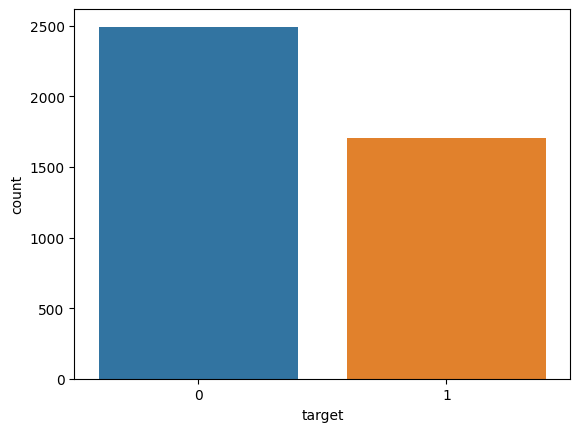

In [19]:
import seaborn as sns
print( df.target.value_counts() )
sns.countplot(x='target', data=df, hue='target', legend=False)

#### Analisis de los datos obtenidos

In [20]:
target_counts = df['target'].value_counts()
target_proportion = target_counts / target_counts.sum()

print("Un " + str(round(100 * target_proportion[0], 2)) + "% de los casos son negativos, es decir no poseen el virus.")
print("Un " + str(round(100 * target_proportion[1], 2)) + "% de los casos son positivos, es decir poseen el virus.")


Un 59.36% de los casos son negativos, es decir no poseen el virus.
Un 40.64% de los casos son positivos, es decir poseen el virus.


Viendo estos resultados, considero que el dataset esta lo suficientemente balanceado. Incluso este dataset tiene mas resultados negativos que positivos, lo cual es algo preferible en el caso de estar ligeramente desbalanceado, como es el caso; ya que permite que si hay error en la prediccion sea por `Verdaderos_Negativos` en lugar de `Falsos_Positivos`

- `Verdaderos_Negativos`: Personas que tienen el virus, pero la prediccion dice que no los tienen
- `Falsos_Positivos`: Personas que no tienen el viruso, pero la prediccion dice que si lo tienen.

### Chequeamos valores anamolos y outliers

Deberiamos primero probar el funcionamiento del modelo sin aplicar ninguna tecnica, y despues ir viendo el comportomiento del modelo a medida que le aplicamos las tecnicas

#### Clase Outliers

In [12]:
class Outliers:
    def __init__(self, df: pd.DataFrame, column_name: str):
        self.df = df
        self.column_name = column_name
        self.outliers = self.calculate()
    
    def calculate(self):
        Q1 = self.df[self.column_name].quantile(0.25)
        Q3 = self.df[self.column_name].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        return self.df[(self.df[self.column_name] < lower_bound) | (self.df[self.column_name] > upper_bound)]

    def replace_with(self, value: float):
        self.df.loc[self.outliers.index, self.column_name] = value
    
    def replace_with_mean(self):
        self.replace_with(self.df[self.column_name].mean())

    def outliers_length(self):
        return len(self.outliers)

In [13]:
def resolve_outliers(column_name: str, df: pd.DataFrame): 
    outliers = Outliers(df, column_name)
    print("La cantidad de outliers con " + column_name + " son: " + str(outliers.outliers_length()))
    print("Histograma inicial")
    df[column_name].plot(kind='hist')

#### BLD01

La cantidad de outliers con BLD01 son: 56
Histograma inicial


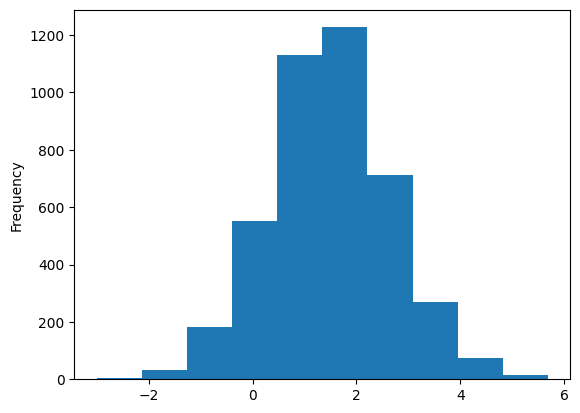

In [14]:
resolve_outliers('BLD01', df)

#### BLD02

La cantidad de outliers con BLD02 son: 55
Histograma inicial


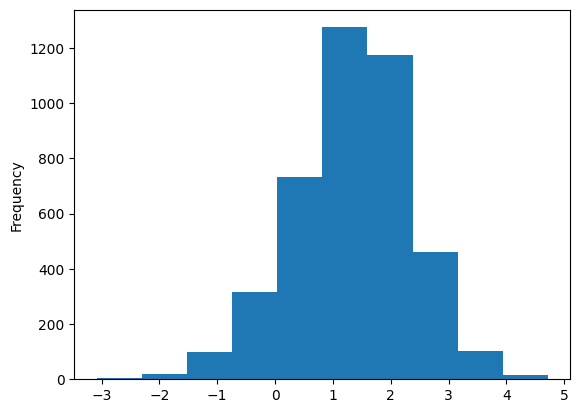

In [15]:
resolve_outliers('BLD02', df)

#### BLD03

La cantidad de outliers con BLD03 son: 68
Histograma inicial


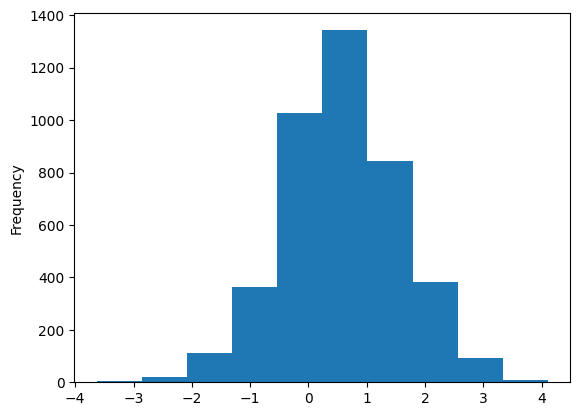

In [16]:
resolve_outliers('BLD03', df)

#### REC1

La cantidad de outliers con REC1 son: 26
Histograma inicial


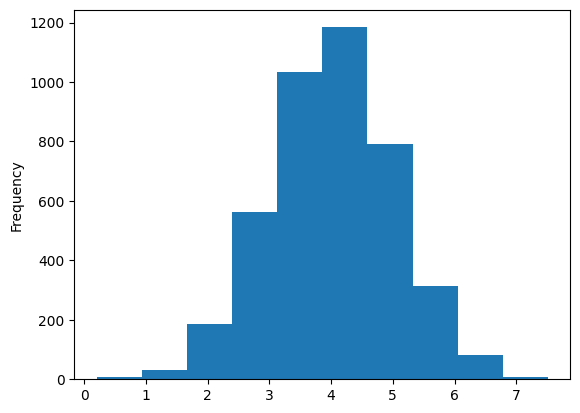

In [17]:
resolve_outliers('REC1', df)

#### REC2

La cantidad de outliers con REC2 son: 23
Histograma inicial


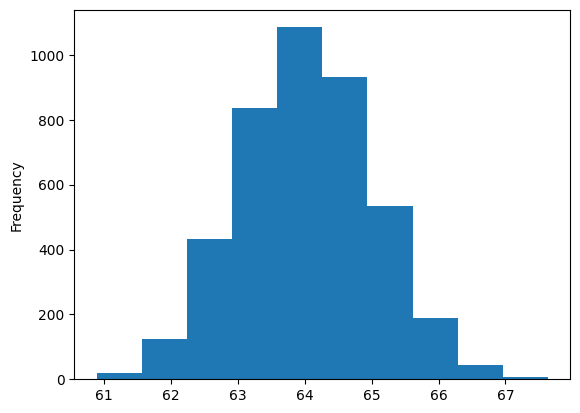

In [18]:
resolve_outliers('REC2', df)

#### REC3

La cantidad de outliers con REC3 son: 40
Histograma inicial


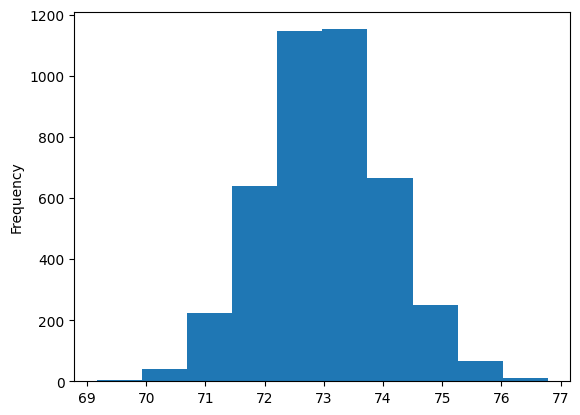

In [19]:
resolve_outliers('REC3', df)

#### REC4

La cantidad de outliers con REC4 son: 30
Histograma inicial


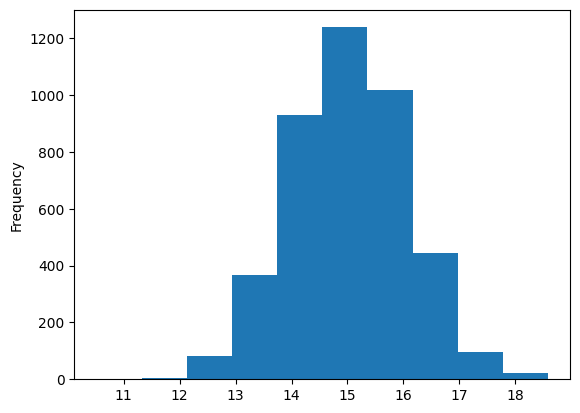

In [20]:
resolve_outliers('REC4', df)

#### REC5

La cantidad de outliers con REC5 son: 27
Histograma inicial


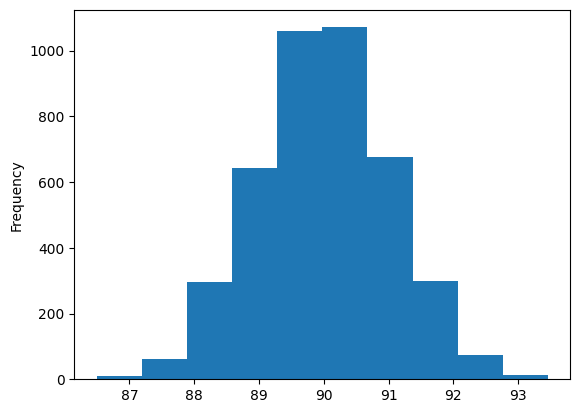

In [21]:
resolve_outliers('REC5', df)

### Correlacion de varialbes

<Axes: >

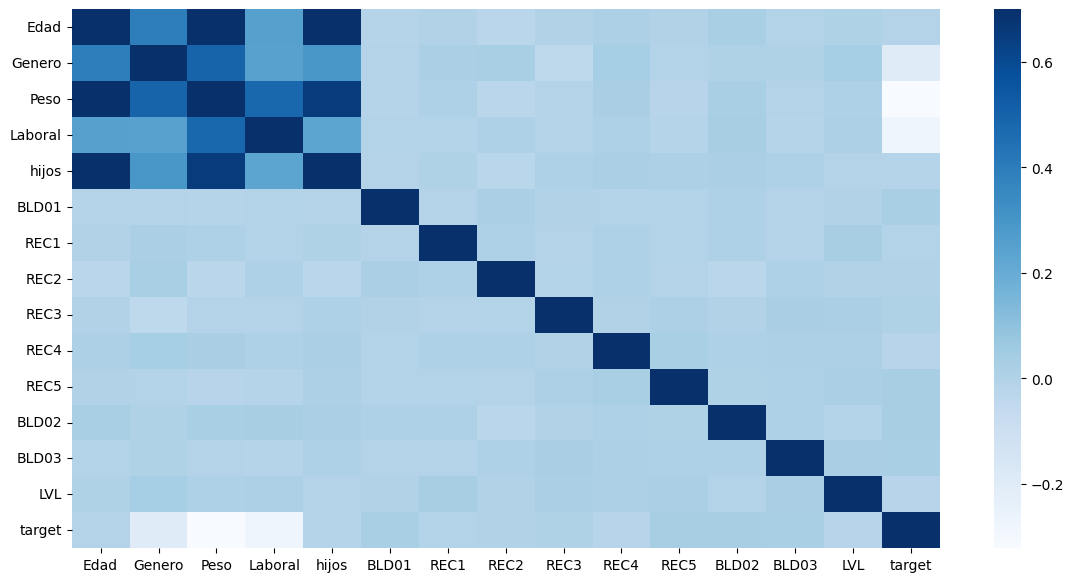

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,7))
sns.heatmap(df.corr(), vmax=.7, cmap ='Blues', fmt=".2f")

Veo que `Peso`, `Laboral` e `hijos` son las unicas variables medianamente correlacionadas. Sin embargo, no llegan a expresar los mismos datos.

Probe eliminado estas variables del dataset, pero obtuve resultados peores de los originales; asi que las dejo como estaban :)

## Entrenamiento

### Separacion de datos para tests y entrenamiento

#### Separo mi variable objetivo del dataframe a entrenar

In [32]:
X_target = df.drop('target', axis=1)
Y_target = df['target']

##### Dataframe sin la variable objetivo

In [33]:
X_target.head()

Edad  Genero        Peso  Laboral  hijos     BLD01      REC1  \
0   9.000000     0.0   36.410602        0      0  3.139714  6.929112   
1  58.000000     1.0  115.507184        0      4  2.953914  4.660136   
2  74.000000     1.0   81.249035        1      3  1.365200  3.005861   
3  38.658082     1.0   77.985589        2      0  2.329285  4.344642   
4   1.000000     0.0   13.446208        0      0 -0.062975  3.938741   

        REC2       REC3       REC4       REC5     BLD02     BLD03  \
0  63.712640  73.880613  15.087239  90.400193  2.015331  1.633836   
1  64.582610  73.669319  14.503106  90.817947  0.973317 -0.439358   
2  63.613454  75.103984  14.077988  91.741638  3.243344  0.380413   
3  64.433115  73.402436  15.583846  91.741709  3.188290 -0.226046   
4  65.122602  75.007982  16.961593  90.668625  2.729202  0.589698   

              LVL  
0       51.411632  
1  1000000.000000  
2  1000000.000000  
3   227134.359847  
4       21.627303

##### Los resultados de cada una de las filas del dataframe `X_target`

In [34]:
Y_target.head()

0    0
1    0
2    1
3    0
4    1
Name: target, dtype: int64

#### Separacion en conjunto de pruebas y conjunto de tests

In [35]:
x_target_scaled, y_target_scaled = standard_scaler_preparacion_datos(df=df, target='target', with_scaler=True)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_target_scaled, y_target_scaled, test_size=0.2, stratify = Y_target, random_state=0)

### Definicion del modelo de entrenamiento

In [37]:
models = Models()
model = models.decission_tree_classfier()

#### Entrenamos al clasificador

In [38]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=0)

#### Resultados obtenidos

Exactitud (accuracy) del modelo: 78.57 %


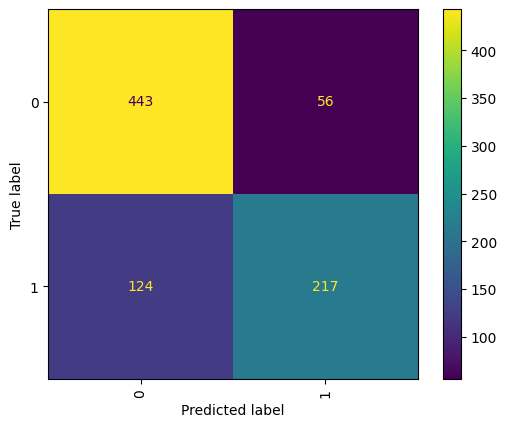

In [39]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
print('Exactitud (accuracy) del modelo: {:.2f} %'.format(accuracy_score(y_test, y_pred)*100))

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test,  xticks_rotation="vertical")

Viendo estos resultados, tanto el % de accurracy como la matriz de confusion; me doy cuenta que se puede mejorar bastante la prediccion, ya que hay 83 casos que fueron `Falsos_Positivos` que son los casos que queremos evitar a toda costa.

Se equivoca bastante, diciendo que no tienen el virus cuando en realidad si lo tienen `Falsos_Negativos` habria que ajustar este tambien, pero el mas importante sigue siendo los `Falsos_Positivos`

## GridSearchCV

In [100]:
from sklearn.model_selection import GridSearchCV
import numpy as np

class GridSearchModels:
    def logistic_regression(self):
        parameters = {
            'penalty': ['l1', 'l2', 'elasticnet'],
            'C': [0.01, 0.1, 1, 10, 100],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'max_iter': [100, 200, 500],
            'tol': [1e-4, 1e-5],
            'fit_intercept': [True, False],
            'class_weight': [None, 'balanced'],
            'l1_ratio': [0, 0.5, 1],
        }
        return GridSearchCV(models.logistic_regression(), parameters, scoring='roc_auc', cv=5)
    
    def decission_tree_classifier(
            self, 
            max_depth: list[int] = [7, 10, 30, 50, 70, 90, 100],
    ):
        parameters = {
            'max_depth': max_depth,
            'min_samples_split' : (2, 4),
            'min_samples_leaf': (3, 9),
            'criterion': ('gini', 'entropy'),
            'splitter': ('best', 'random'),
            'max_features': ('auto', 'sqrt', 'log2'),
            'max_leaf_nodes': (2, None),
            'min_impurity_decrease': (0.0, 5.0, 10.0, 20.0, 50.0),
        }
        return GridSearchCV(models.decission_tree_classfier(), parameters, verbose=True, cv=5)
    
    def gaussian(self):
        parameters = {
            'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3],
        }
        return GridSearchCV(models.gaussian(), parameters, cv=5, scoring='accuracy')


#### Grafico con predicciones previas

In [101]:
gs_models = GridSearchModels()
clf = gs_models.logistic_regression()

clf.fit(X_train, y_train)

C:\Users\Facundo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Facundo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Facundo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\Facundo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\sit

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'fit_intercept': [True, False],
                         'l1_ratio': [0, 0.5, 1], 'max_iter': [100, 200, 500],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'tol': [0.0001, 1e-05]},
             scoring='roc_auc')

In [102]:
print("Best Parameters:", clf.best_params_)
print("Best Score:", clf.best_score_)

Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 500, 'penalty': 'l1', 'solver': 'saga', 'tol': 0.0001}
Best Score: 0.7474514410802376


## Pipeline

In [12]:
from sklearn.base import BaseEstimator, TransformerMixin

### Imputadores

In [13]:
from sklearn.impute import SimpleImputer

#### Imputador simple

In [14]:
class ColSimpleImputer(BaseEstimator, TransformerMixin):
    def __init__(self, columns: list[str], imputer=SimpleImputer(strategy='mean')):
        super().__init__()
        self.imputer = imputer
        self.columns = columns

    def fit(self, x: pd.DataFrame, y=None):
        self.imputer.fit(x[self.columns])
        return self

    def get_feature_names_out(self):
        return self.imputer.get_feature_names_out()

    def  transform(self, x: pd.DataFrame):
        x_copy = x.copy()
        x_copy.loc[:, self.columns] = self.imputer.transform(x_copy[self.columns])
        return x_copy

#### Imputador complejo

In [15]:
class ColComplexImputer(BaseEstimator, TransformerMixin):
    def __init__(self, columns: list[str]):
        super().__init__()
        self.columns = columns

    def fit(self, x: pd.DataFrame, y=None):
        return self

    def get_feature_names_out(self):
        return self.columns

    def  transform(self, x: pd.DataFrame):
        for column_name in self.columns:
            df_cleaned = x.dropna(subset=[column_name])

            X_target = df_cleaned.drop(column_name, axis=1)
            Y_target = df_cleaned[column_name]

            models = Models()
            model = models.decission_tree_classfier()

            model.fit(X_target, Y_target)

            X_test = x[x[column_name].isna()]
            X_test = X_test.drop(column_name, axis=1)
            y_pred = model.predict(X_test)

            for idx, row in x.iterrows():
                i = 0
                if np.isnan(row[column_name]):
                    x.loc[idx, column_name] = y_pred[i]
                    i += 1
        return x

### OneHot Encoding

In [16]:
from sklearn.preprocessing import OneHotEncoder
class ColOneHot(BaseEstimator, TransformerMixin):
    def __init__(
            self, 
            columns: list[str], 
            encoder=OneHotEncoder(sparse_output=False, drop='first', dtype=int)
    ):
        super().__init__()
        self.encoder = encoder
        self.columns = columns

    def fit(self, x: pd.DataFrame, y=None):
        self.encoder.fit(x[self.columns])
        return self

    def get_feature_names_out(self):
        return self.encoder.get_feature_names_out(self.columns)

    def  transform(self, x: pd.DataFrame):
        X_copy = x.copy()
        transformed = self.encoder.transform(X_copy[self.columns])

        transformed_df = pd.DataFrame(
            transformed,
            index=X_copy.index,
            columns=self.get_feature_names_out()
        )
        
        # Eliminar las columnas originales
        X_copy.drop(columns=self.columns, inplace=True)
        
        # Concatenar el DataFrame transformado con el DataFrame original
        X_copy = pd.concat([X_copy, transformed_df], axis=1)
        
        return X_copy

### Col StandarScaler

In [17]:
from sklearn.preprocessing import StandardScaler
class ColStandarScaler(BaseEstimator, TransformerMixin):
    def __init__(self, columns: list[str], scaler=StandardScaler()):
        self.scaler = scaler
        self.columns = columns

    def fit(self, x: pd.DataFrame, y=None):
        self.scaler.fit(x[self.columns])
        return self
    
    def get_feature_names_out(self):
        return None
    
    def  transform(self, x: pd.DataFrame):
        x_copy = x.copy()
        x_copy[self.columns] = self.scaler.transform(x_copy[self.columns])
        return x_copy

### Separacion de conjunto de datos

In [18]:
x_target = df.drop('target', axis=1)
y_target = df['target']

X_train, X_test, y_train, y_test = train_test_split(x_target, y_target, random_state=3, test_size=0.2)

NameError: name 'train_test_split' is not defined

### Desarrollo de Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[
    ('SimpleImputador', ColSimpleImputer(columns=['Edad', 'LVL'])),
    ('ComplexImputador', ColComplexImputer(columns=['Genero'])),
    ('StandardScaler', ColStandarScaler(columns=['BLD01', 'BLD02', 'BLD03', 'REC1', 'REC2', 'REC3', 'REC4', 'REC5'])),
    ('classifier', models.decission_tree_classfier())
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('SimpleImputador', ColSimpleImputer(columns=['Edad', 'LVL'])),
                ('ComplexImputador', ColComplexImputer(columns=['Genero'])),
                ('StandardScaler',
                 ColStandarScaler(columns=['BLD01', 'BLD02', 'BLD03', 'REC1',
                                           'REC2', 'REC3', 'REC4', 'REC5'])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=7, random_state=0))])

Exactitud (accuracy) del modelo: 78.81 %


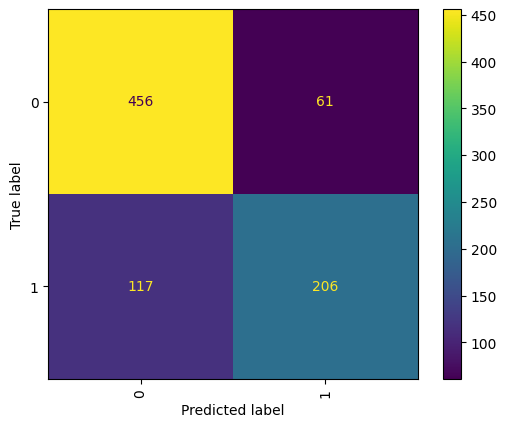

In [ ]:
pipeline_pred = pipeline.predict(X_test)
print('Exactitud (accuracy) del modelo: {:.2f} %'.format(accuracy_score(y_test, pipeline_pred)*100))

ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test,  xticks_rotation="vertical")

## Evaluacion final - Docente + Alumno

In [ ]:
"""
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

PRODUCCION = False
best_clf = None #Asignar aqui el mejor clasificador posible (previamente entrenado)

#Leemos el dataset de evaluaciÃ³n, simulando producciÃ³n
if PRODUCCION==False:
    df = pd.read_csv("./dataset.csv")
    _, df = train_test_split(df, test_size=0.3, random_state=42)
else:
    df = pd.read_csv("TP_Virus_Evaluacion.csv")
#Dividimos en target y predictoras

X_prod = df.drop("target", axis=1)
y_prod = df["target"]

#Transformaciones


#EvaluaciÃ³n final
y_pred = best_clf.predict(X_prod)
print(classification_report(y_prod, y_pred))
"""

'\nimport pandas as pd\nfrom sklearn.metrics import classification_report\nfrom sklearn.model_selection import train_test_split\n\nPRODUCCION = False\nbest_clf = None #Asignar aqui el mejor clasificador posible (previamente entrenado)\n\n#Leemos el dataset de evaluaciÃ³n, simulando producciÃ³n\nif PRODUCCION==False:\n    df = pd.read_csv("./dataset.csv")\n    _, df = train_test_split(df, test_size=0.3, random_state=42)\nelse:\n    df = pd.read_csv("TP_Virus_Evaluacion.csv")\n#Dividimos en target y predictoras\n\nX_prod = df.drop("target", axis=1)\ny_prod = df["target"]\n\n#Transformaciones\n\n\n#EvaluaciÃ³n final\ny_pred = best_clf.predict(X_prod)\nprint(classification_report(y_prod, y_pred))\n'